In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# Cargamos los datos
df = pd.read_csv('C:/Users/Usuario/Documents/PortafolioDS/DATA/UCR_planilla_mayo2023.csv', sep=';')

# Establecemos la opción de formato de pandas para separar los miles con comas
pd.options.display.float_format = '{:,.3f}'.format

#Establecemos el diseño de los graficos
sns.set(style='darkgrid', context='notebook')

df

,PUESTO,SALARIO,JORNADA,AÑOS DE SERVICIO,MES COMPLETO,CARGO ADMINISTRATIVO
0,TECNICO ESPECIALIZADO D,"2,156,945.000",1.000,40,,TÉCNICO EN GUÍA DE HORARIOS Y CURSOS ...
1,PROFESOR INTERINO LICENCIADO,"209,919.000",0.250,0,,PUESTO NO ADMINISTRATIVO
2,TECNICO ESPECIALIZADO D,"2,054,192.000",1.000,35,,TÉCNICO EN MANTENIMIENTO DE REDES DE TELECOMUN...
3,PROFESIONAL C,"3,314,127.000",1.000,33,,PROFESIONAL COORDINADOR DE PROGRAMA DE VOLUNTA...
4,PROFESOR CATEDRATICO,"4,173,191.000",1.000,26,,PUESTO NO ADMINISTRATIVO
...,...,...,...,...,...,...
9661,TRABAJADOR OPERATIVO B,"92,624.450",0.500,0,MES INCOMPLETO,REVISOR DE SALIDA DE RECURSOS BIBLIOGRÁFICOS Y...
9662,TRABAJADOR OPERATIVO B,"410,194.000",1.000,0,,CONSERJE ...
9663,PROFESOR INTERINO LICENCIADO,"104,959.450",0.125,0,,PUESTO NO ADMINISTRATIVO
9664,TECNICO ASISTENCIAL A,"443,302.000",1.000,0,,ASISTENTE DE OFICINA ...


In [3]:
# Eliminamos columnas que no vamos a usar
df = df.drop('MES COMPLETO',axis=1)

In [4]:
df.dtypes

PUESTO                   object
SALARIO                 float64
JORNADA                 float64
AÑOS DE SERVICIO          int64
CARGO ADMINISTRATIVO     object
dtype: object

In [5]:
df['PUESTO'].nunique()

61

In [6]:
df[['CARGO','RANGO']] = df['PUESTO'].str.split(' ', n=1, expand = True)
df

,PUESTO,SALARIO,JORNADA,AÑOS DE SERVICIO,CARGO ADMINISTRATIVO,CARGO,RANGO
0,TECNICO ESPECIALIZADO D,"2,156,945.000",1.000,40,TÉCNICO EN GUÍA DE HORARIOS Y CURSOS ...,TECNICO,ESPECIALIZADO D
1,PROFESOR INTERINO LICENCIADO,"209,919.000",0.250,0,PUESTO NO ADMINISTRATIVO,PROFESOR,INTERINO LICENCIADO
2,TECNICO ESPECIALIZADO D,"2,054,192.000",1.000,35,TÉCNICO EN MANTENIMIENTO DE REDES DE TELECOMUN...,TECNICO,ESPECIALIZADO D
3,PROFESIONAL C,"3,314,127.000",1.000,33,PROFESIONAL COORDINADOR DE PROGRAMA DE VOLUNTA...,PROFESIONAL,C
4,PROFESOR CATEDRATICO,"4,173,191.000",1.000,26,PUESTO NO ADMINISTRATIVO,PROFESOR,CATEDRATICO
...,...,...,...,...,...,...,...
9661,TRABAJADOR OPERATIVO B,"92,624.450",0.500,0,REVISOR DE SALIDA DE RECURSOS BIBLIOGRÁFICOS Y...,TRABAJADOR,OPERATIVO B
9662,TRABAJADOR OPERATIVO B,"410,194.000",1.000,0,CONSERJE ...,TRABAJADOR,OPERATIVO B
9663,PROFESOR INTERINO LICENCIADO,"104,959.450",0.125,0,PUESTO NO ADMINISTRATIVO,PROFESOR,INTERINO LICENCIADO
9664,TECNICO ASISTENCIAL A,"443,302.000",1.000,0,ASISTENTE DE OFICINA ...,TECNICO,ASISTENCIAL A


In [7]:
df['CARGO'].nunique()

14

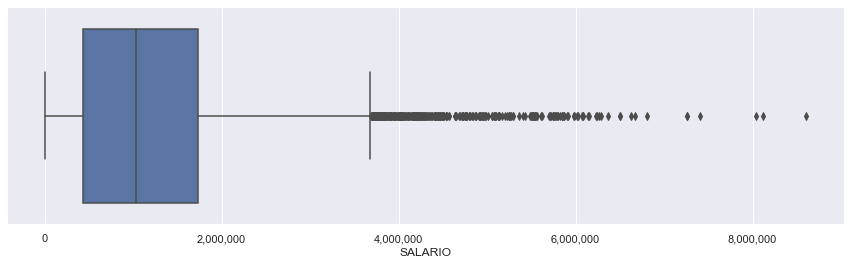

In [8]:
plt.figure(figsize=(15,4))

sns.boxplot(data=df,x='SALARIO')

formateador = ticker.StrMethodFormatter("{x:,.0f}")
plt.gca().xaxis.set_major_formatter(formateador)

In [9]:
df['SALARIO'].describe()

count       9,666.000
mean    1,244,898.788
std     1,052,115.870
min         6,350.500
25%       430,898.500
50%     1,028,092.000
75%     1,732,156.750
max     8,605,383.000
Name: SALARIO, dtype: float64

El grafico anterior nos muestra el rango salarial y podemos apreciar que de 4 millones de colones en adelante se consideran outliers, por lo que podemos crear un filtro donde solo se tomen en cuenta los salarios menores a 4M o excluir el top 5%.

In [10]:
data_sin_outliers = df[df['SALARIO'] < df['SALARIO'].quantile(0.95)]

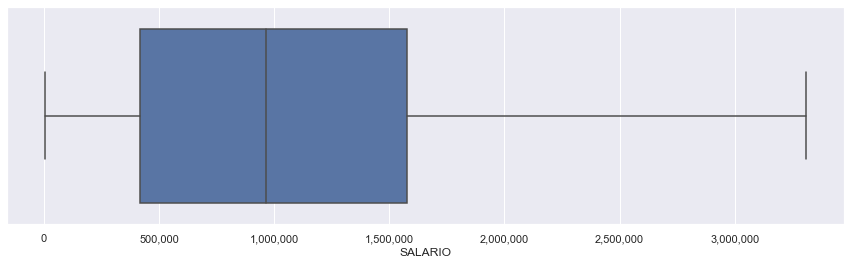

In [11]:
plt.figure(figsize=(15,4))

sns.boxplot(data=data_sin_outliers,x='SALARIO')

formateador = ticker.StrMethodFormatter("{x:,.0f}")
plt.gca().xaxis.set_major_formatter(formateador)

In [12]:
data_sin_outliers['SALARIO'].describe()

count       9,182.000
mean    1,087,773.489
std       794,151.441
min         6,350.500
25%       419,838.000
50%       963,462.900
75%     1,577,792.000
max     3,309,700.000
Name: SALARIO, dtype: float64

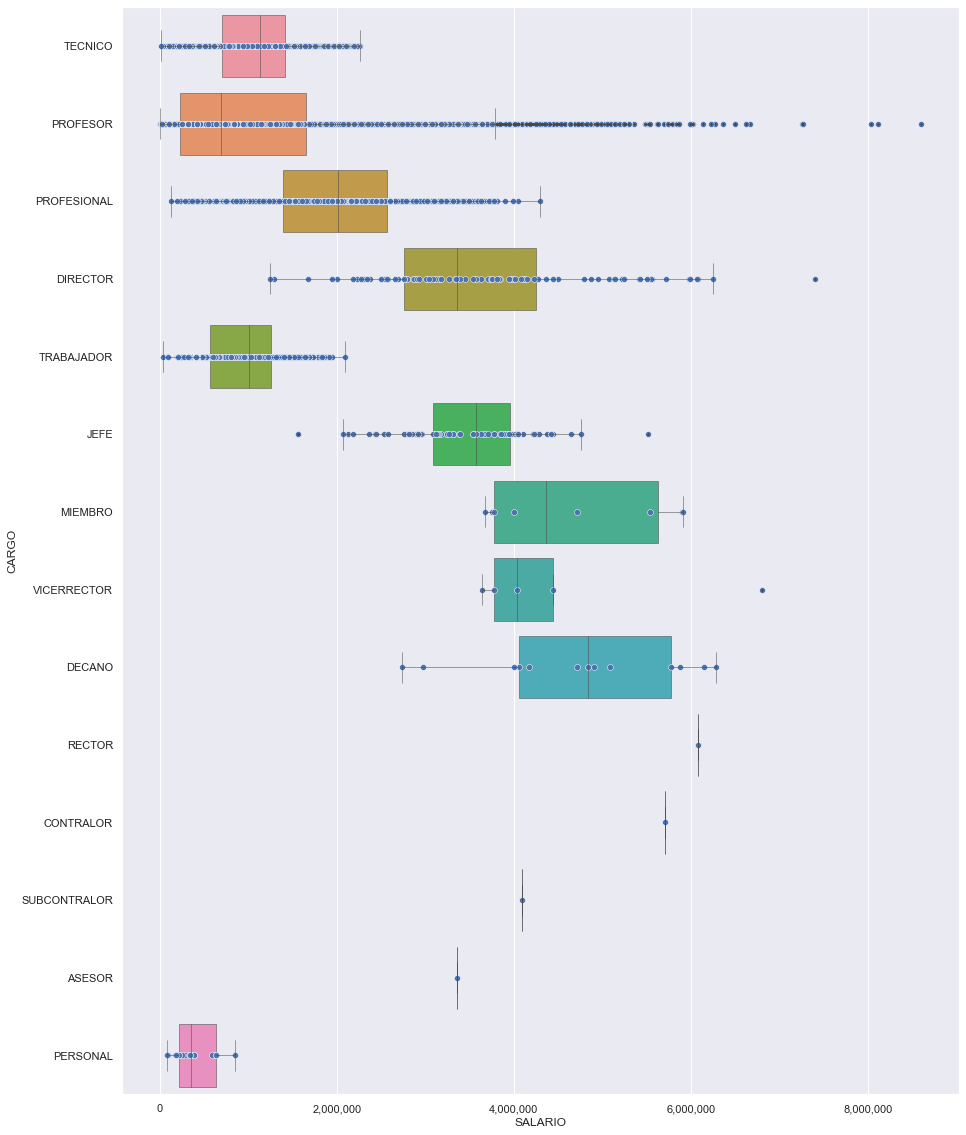

In [13]:
plt.figure(figsize=(15,20))

sns.scatterplot(data=df,x='SALARIO',y='CARGO')
sns.boxplot(data=df,x='SALARIO',y='CARGO', linewidth=0.5,fliersize=1.5)

formateador = ticker.StrMethodFormatter("{x:,.0f}")
plt.gca().xaxis.set_major_formatter(formateador)

In [14]:
cargos = df.groupby('CARGO')['SALARIO'].count().reset_index().sort_values('SALARIO',ascending=False)
cargos.columns = ['CARGO','RECUENTO']
cargos

,CARGO,RECUENTO
8,PROFESOR,5515
11,TECNICO,1934
7,PROFESIONAL,1143
12,TRABAJADOR,836
3,DIRECTOR,99
4,JEFE,81
6,PERSONAL,28
2,DECANO,13
5,MIEMBRO,8
13,VICERRECTOR,5


([<matplotlib.axis.YTick at 0x1a03336b1c0>,
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.1, '1.1'),
  Text(0, 1.2000000000000002, '1.2'),
  Text(0, 1.3, '1.3')])

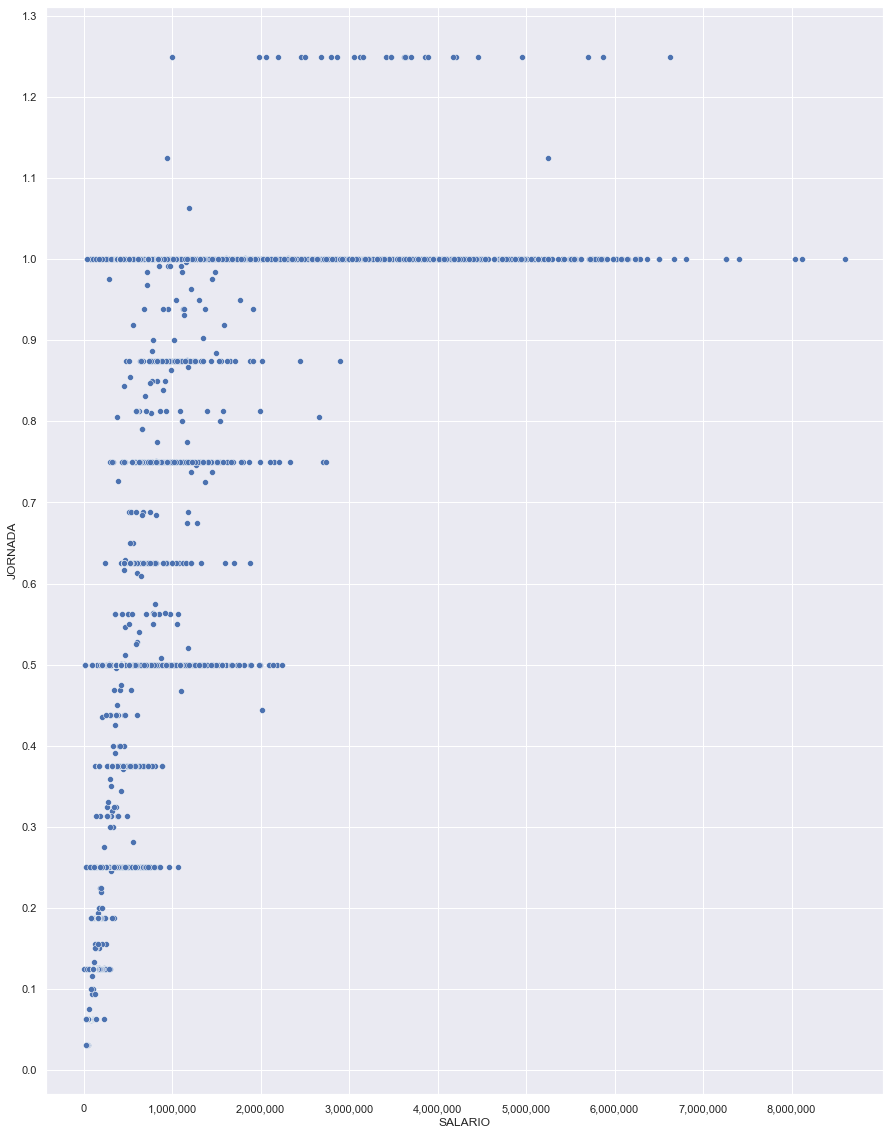

In [15]:
plt.figure(figsize=(15,20))

sns.scatterplot(data=df,x='SALARIO',y='JORNADA')

formateador = ticker.StrMethodFormatter("{x:,.0f}")
plt.gca().xaxis.set_major_formatter(formateador)

x_ticks = np.arange(0, 9000000, step=1000000)
plt.xticks(x_ticks)

y_ticks = np.arange(0, 1.4, step=0.1)
plt.yticks(y_ticks)

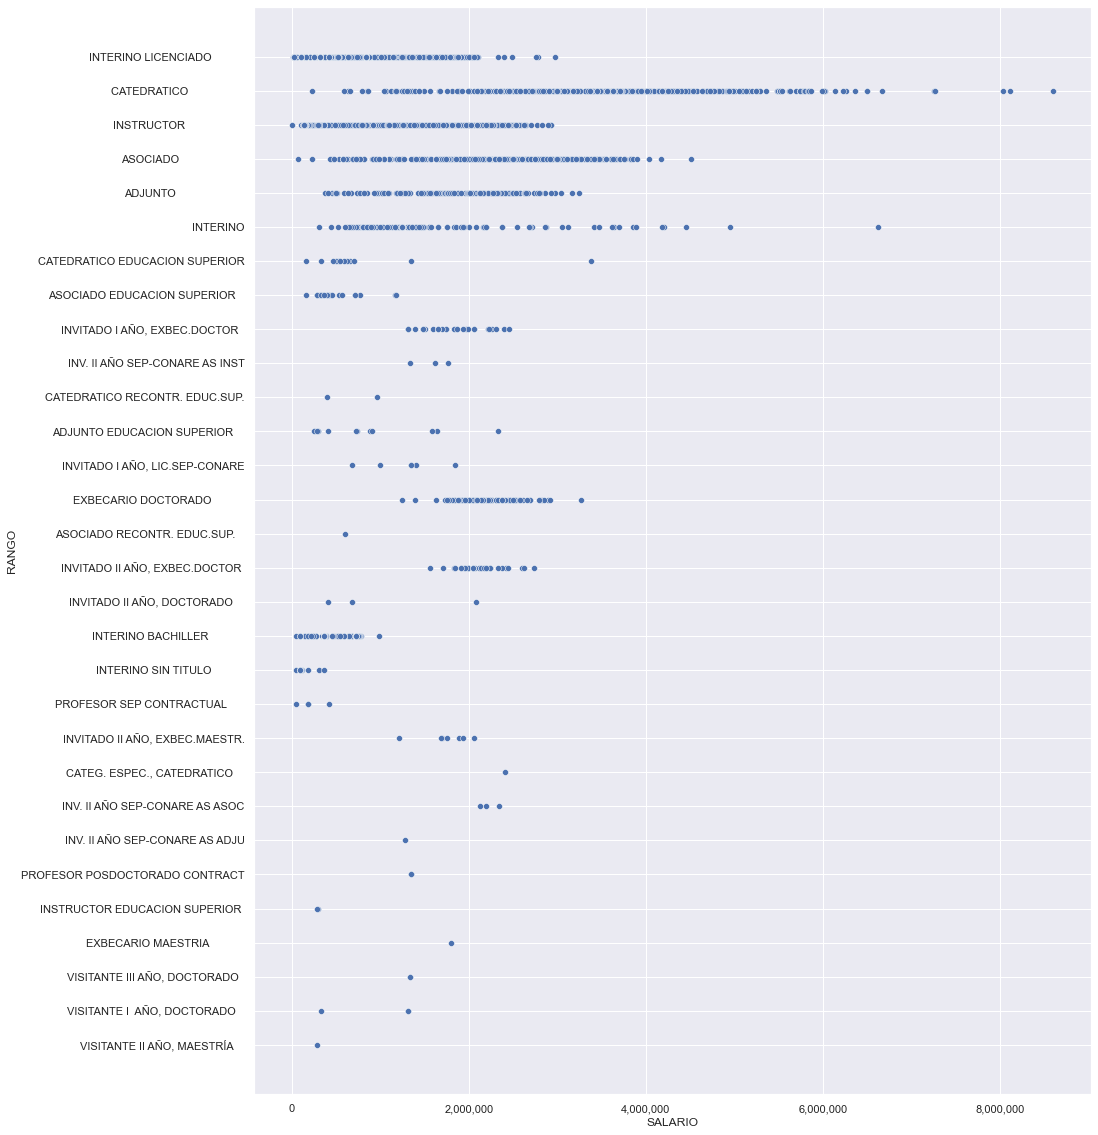

In [16]:
plt.figure(figsize=(15,20))

sns.scatterplot(data=df[df['CARGO'] == 'PROFESOR'],x='SALARIO', y='RANGO')

formateador = ticker.StrMethodFormatter("{x:,.0f}")
plt.gca().xaxis.set_major_formatter(formateador)

In [17]:
colors = [
    "#1f77b4",  # Azul
    "#ff7f0e",  # Naranja
    "#2ca02c",  # Verde
    "#d62728",  # Rojo
    "#9467bd",  # Morado
    "#8c564b",  # Marrón
    "#e377c2",  # Rosa
    "#7f7f7f",  # Gris
    "#bcbd22",  # Amarillo
    "#17becf",  # Turquesa
    "#aec7e8",  # Azul claro
    "#ffbb78",  # Naranja claro
    "#98df8a",  # Verde claro
    "#ff9896",  # Rojo claro
]

([<matplotlib.axis.XTick at 0x1a033277c40>,
 [Text(0, 0, '0'),
  Text(1000000, 0, '1,000,000'),
  Text(2000000, 0, '2,000,000'),
  Text(3000000, 0, '3,000,000'),
  Text(4000000, 0, '4,000,000'),
  Text(5000000, 0, '5,000,000'),
  Text(6000000, 0, '6,000,000'),
  Text(7000000, 0, '7,000,000'),
  Text(8000000, 0, '8,000,000')])

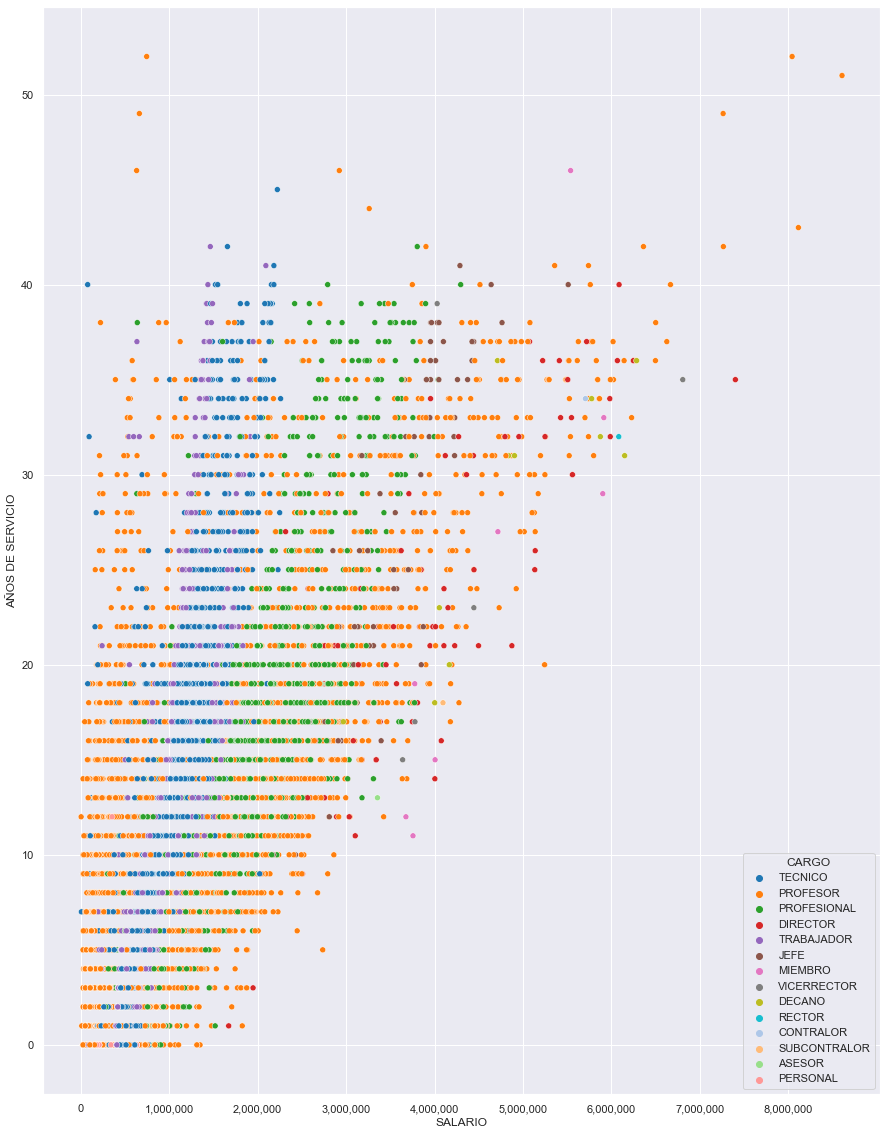

In [18]:
plt.figure(figsize=(15,20))

sns.scatterplot(data=df,x='SALARIO',y='AÑOS DE SERVICIO', hue='CARGO', palette = colors)

formateador = ticker.StrMethodFormatter("{x:,.0f}")
plt.gca().xaxis.set_major_formatter(formateador)

x_ticks = np.arange(0, 9000000, step=1000000)
plt.xticks(x_ticks)

In [19]:
df['ES ADMIN'] = df['CARGO ADMINISTRATIVO'].apply(lambda row: 'No' if row == 'PUESTO NO ADMINISTRATIVO' else 'Si')
df

,PUESTO,SALARIO,JORNADA,AÑOS DE SERVICIO,CARGO ADMINISTRATIVO,CARGO,RANGO,ES ADMIN
0,TECNICO ESPECIALIZADO D,"2,156,945.000",1.000,40,TÉCNICO EN GUÍA DE HORARIOS Y CURSOS ...,TECNICO,ESPECIALIZADO D,Si
1,PROFESOR INTERINO LICENCIADO,"209,919.000",0.250,0,PUESTO NO ADMINISTRATIVO,PROFESOR,INTERINO LICENCIADO,No
2,TECNICO ESPECIALIZADO D,"2,054,192.000",1.000,35,TÉCNICO EN MANTENIMIENTO DE REDES DE TELECOMUN...,TECNICO,ESPECIALIZADO D,Si
3,PROFESIONAL C,"3,314,127.000",1.000,33,PROFESIONAL COORDINADOR DE PROGRAMA DE VOLUNTA...,PROFESIONAL,C,Si
4,PROFESOR CATEDRATICO,"4,173,191.000",1.000,26,PUESTO NO ADMINISTRATIVO,PROFESOR,CATEDRATICO,No
...,...,...,...,...,...,...,...,...
9661,TRABAJADOR OPERATIVO B,"92,624.450",0.500,0,REVISOR DE SALIDA DE RECURSOS BIBLIOGRÁFICOS Y...,TRABAJADOR,OPERATIVO B,Si
9662,TRABAJADOR OPERATIVO B,"410,194.000",1.000,0,CONSERJE ...,TRABAJADOR,OPERATIVO B,Si
9663,PROFESOR INTERINO LICENCIADO,"104,959.450",0.125,0,PUESTO NO ADMINISTRATIVO,PROFESOR,INTERINO LICENCIADO,No
9664,TECNICO ASISTENCIAL A,"443,302.000",1.000,0,ASISTENTE DE OFICINA ...,TECNICO,ASISTENCIAL A,Si


([<matplotlib.axis.XTick at 0x1a0338cb7f0>,
 [Text(0, 0, '0'),
  Text(1000000, 0, '1,000,000'),
  Text(2000000, 0, '2,000,000'),
  Text(3000000, 0, '3,000,000'),
  Text(4000000, 0, '4,000,000'),
  Text(5000000, 0, '5,000,000'),
  Text(6000000, 0, '6,000,000'),
  Text(7000000, 0, '7,000,000'),
  Text(8000000, 0, '8,000,000')])

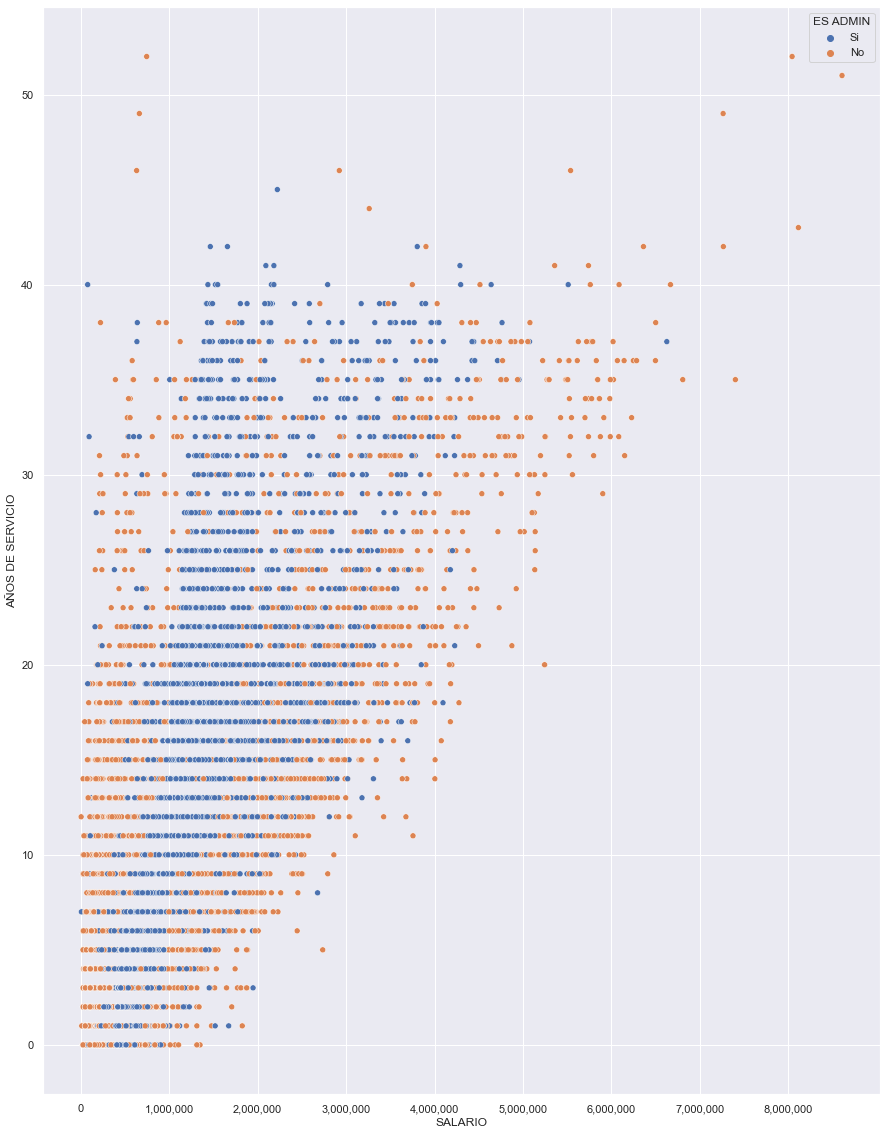

In [20]:
plt.figure(figsize=(15,20))

sns.scatterplot(data=df,x='SALARIO',y='AÑOS DE SERVICIO', hue='ES ADMIN')

formateador = ticker.StrMethodFormatter("{x:,.0f}")
plt.gca().xaxis.set_major_formatter(formateador)

x_ticks = np.arange(0, 9000000, step=1000000)
plt.xticks(x_ticks)

([<matplotlib.axis.XTick at 0x1a039aa4550>,
 [Text(0, 0, '0'),
  Text(1000000, 0, '1,000,000'),
  Text(2000000, 0, '2,000,000'),
  Text(3000000, 0, '3,000,000'),
  Text(4000000, 0, '4,000,000'),
  Text(5000000, 0, '5,000,000'),
  Text(6000000, 0, '6,000,000'),
  Text(7000000, 0, '7,000,000'),
  Text(8000000, 0, '8,000,000')])

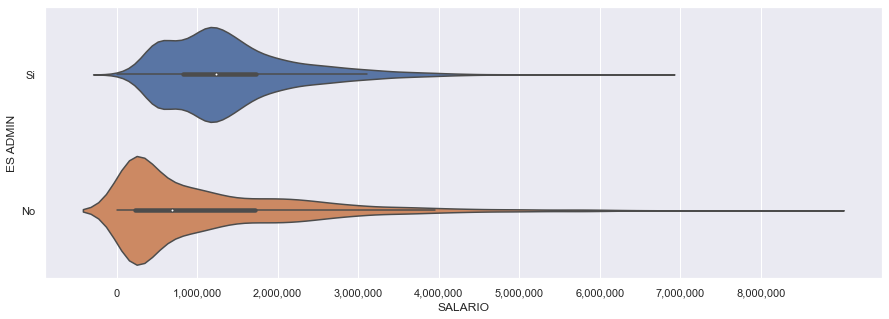

In [31]:
plt.figure(figsize=(15,5))

sns.violinplot(data=df,x='SALARIO',y='ES ADMIN')

formateador = ticker.StrMethodFormatter("{x:,.0f}")
plt.gca().xaxis.set_major_formatter(formateador)

x_ticks = np.arange(0, 9000000, step=1000000)
plt.xticks(x_ticks)